# MHD waves

In [8]:
import numpy as np

import matplotlib.pyplot as plt

In [9]:
plt.rcParams['text.usetex'] = True

## Dispersion diagrams

The wave equation for MHD waves in a homogenous medium can be given as

$$
    \frac{\partial^{2} \mathbf{v}_{1}}{\partial t^{2}}
    -
    \left[
        \left( \mathbf{b} \cdot \nabla \right)^{2} \mathbf{I}
        +
        \left( b^{2} + c^{2} \right) \nabla \nabla
        -
        \mathbf{b} \cdot \nabla \left( \nabla \mathbf{b} + \mathbf{b} \nabla \right)
    \right]
    \cdot
    \mathbf{v}_{1}
    =
    0.
$$

Inserting plane wave solutions into this equation results in the following eigenvalue problem:

$$
    \left\{
        \left[ \omega^{2} - \left( \mathbf{k} \cdot \mathbf{b} \right)^{2} \right] \mathbf{I}
        -
        \left( b^{2} + c^{2} \right) \mathbf{k} \mathbf{k}
        +
        \mathbf{k} \cdot \mathbf{b} \left( \mathbf{k} \mathbf{b} + \mathbf{b} \mathbf{k} \right)
    \right\}.
$$

This can be expanded to components as:

$$
    \begin{pmatrix}
        -k_{\perp}^{2} \left( b^{2} + c^{2} \right) - k_{\parallel}^{2} b^{2} & 0                        & -k_{\perp} k_{\parallel} c^{2} \\
        0                                                                     & -k_{\parallel}^{2} b^{2} & 0                              \\
        -k_{\perp} k_{\parallel} c^{2}                                        & 0                        & -k_{\parallel}^{2} c^{2}
    \end{pmatrix}
    \begin{pmatrix}
        \hat{v}_{x} \\ \hat{v}_{y} \\ \hat{v}_{z}
    \end{pmatrix}
    =
    -w^{2}
    \begin{pmatrix}
        \hat{v}_{x} \\ \hat{v}_{y} \\ \hat{v}_{z}
    \end{pmatrix}.
$$

In [42]:
xlim = (-1, 1)
cpb = [0.8, 1.0, 1.2]

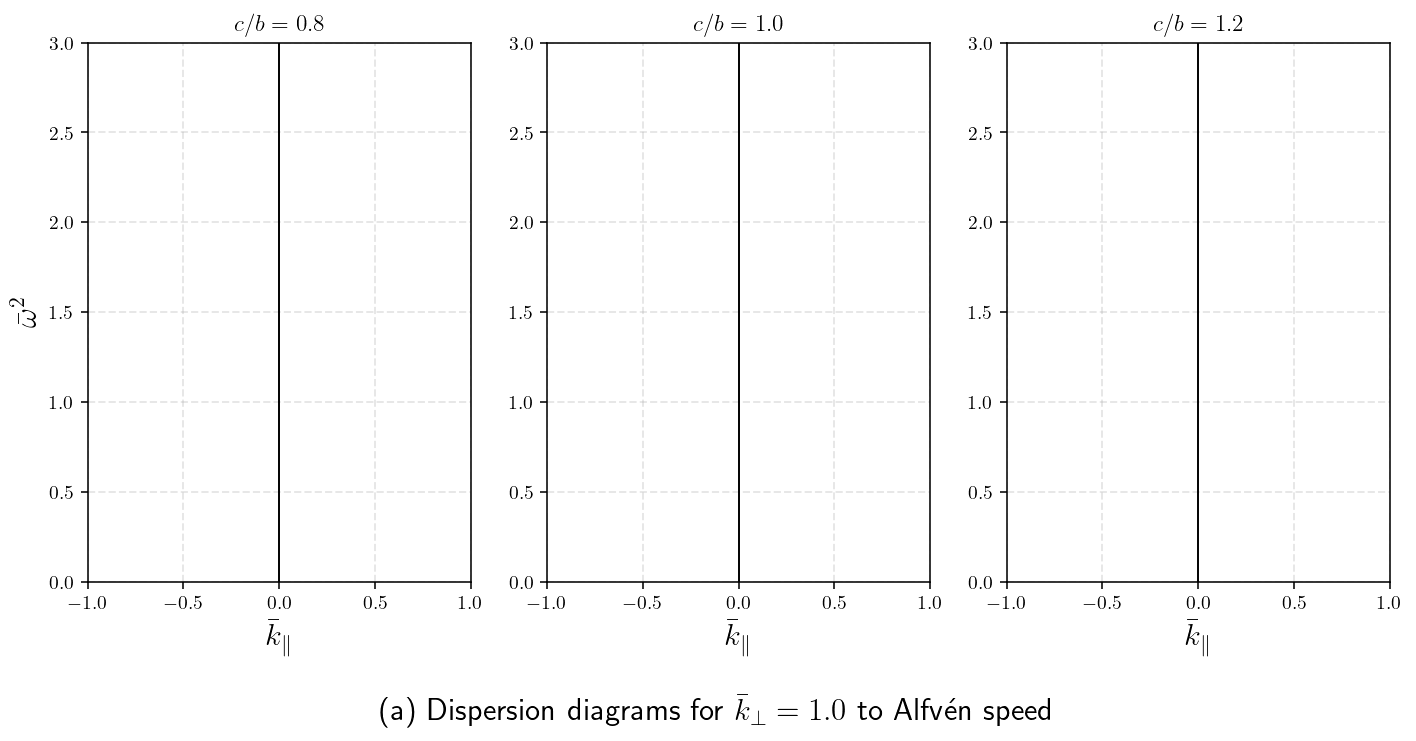

In [39]:
nr, nc = 1, len(cpb)
fig, axes = plt.subplots(nr, nc, figsize=(nc*4, nr*5), dpi=140)

for i, ax in enumerate(axes.flat):
    ax.grid(True, lw=1, ls='--', alpha=0.3)
    ax.set_title(f'$c / b = {cpb[i]}$')
    ax.set_xlabel('$\\bar{k}_{\\parallel}$', fontsize=16)
    ax.set_xlim(*xlim)
    ax.set_ylim(0, 3.0)
    ax.axvline(x=0, color='black', lw=1)
axes[0].set_ylabel('$\\bar{\omega}^{2}$', fontsize=16)

fig.suptitle('(a) Dispersion diagrams for $\\bar{k}_{\\perp} = 1.0$ to Alfvén speed',
             y=-0.05, fontsize=16)
plt.show()

## Phase and group diagrams

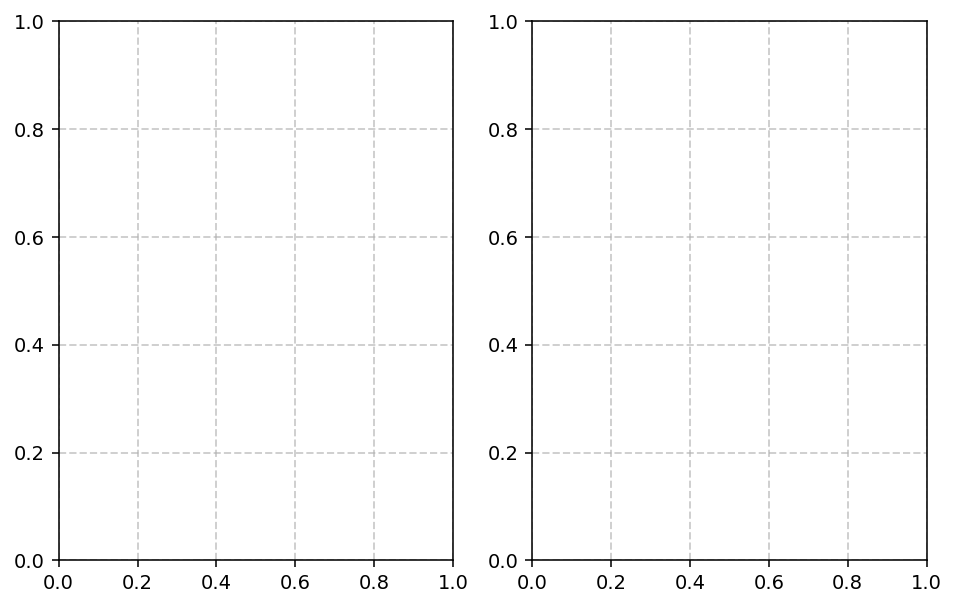

In [9]:
nr, nc = 1, 2
fig, axes = plt.subplots(nr, nc, figsize=(nc*4, nr*5), dpi=140)

for ax in axes.flat:
    ax.grid(True, lw=1, ls='--', alpha=0.6)

plt.show()